In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import numpy as np

In [10]:
detector = dlib.get_frontal_face_detector()
model = dlib.shape_predictor('drive/MyDrive/shape_predictor_5_face_landmarks.dat')

RuntimeError: Unable to open content/drive/MyDrive/shape_predictor_5_face_landmarks.dat

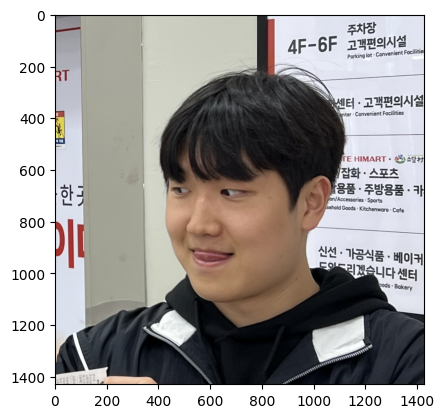

In [12]:
img = dlib.load_rgb_image('drive/MyDrive/side.jpg')

plt.imshow(img)

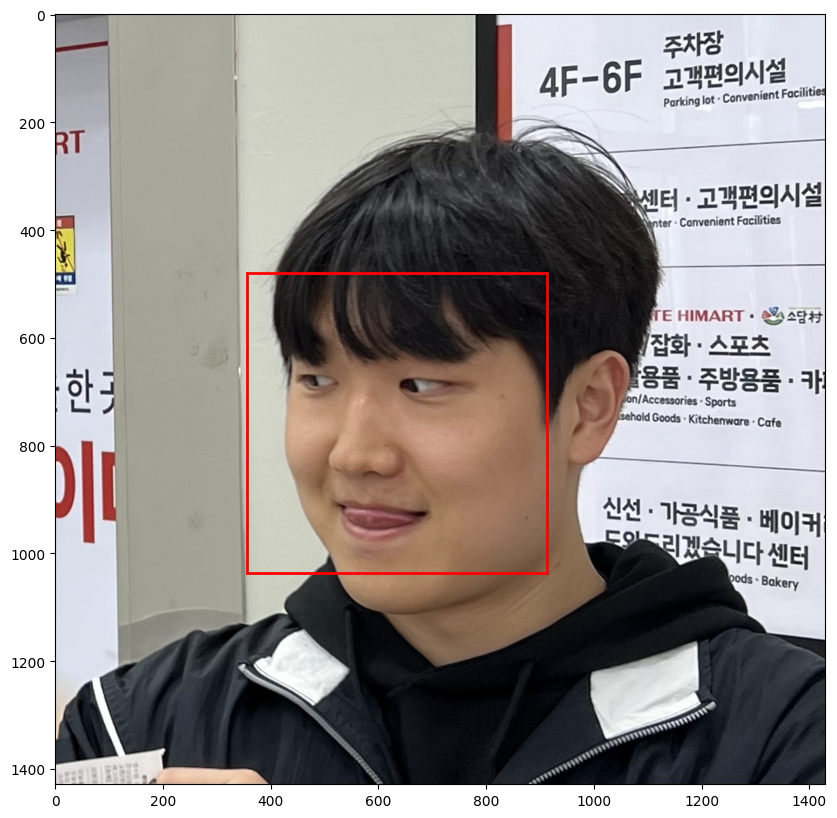

In [13]:
dets = detector(img, 1)

fig, ax = plt.subplots(1, figsize=(16, 10))

for det in dets:
    x, y, w, h = det.left(), det.top(), det.width(), det.height()

    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.imshow(img)

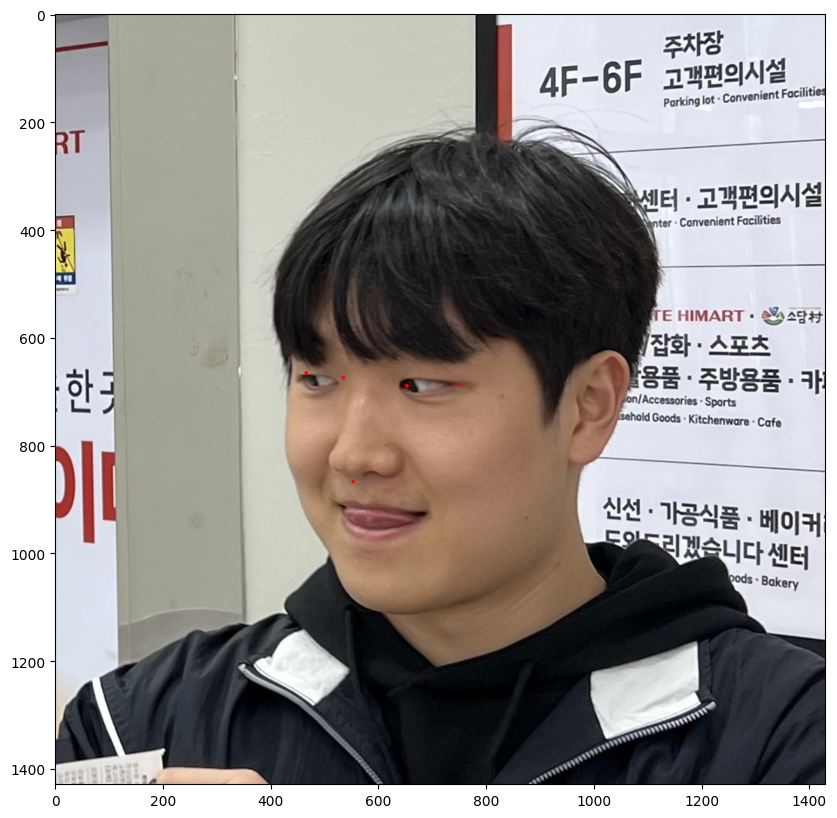

In [14]:
fig, ax = plt.subplots(1, figsize=(16, 10))

objs = dlib.full_object_detections()

for detection in dets:
    s = model(img, detection)
    objs.append(s)

    for point in s.parts():
        circle = patches.Circle((point.x, point.y), radius=2, edgecolor='r', facecolor='r')
        ax.add_patch(circle)

ax.imshow(img)

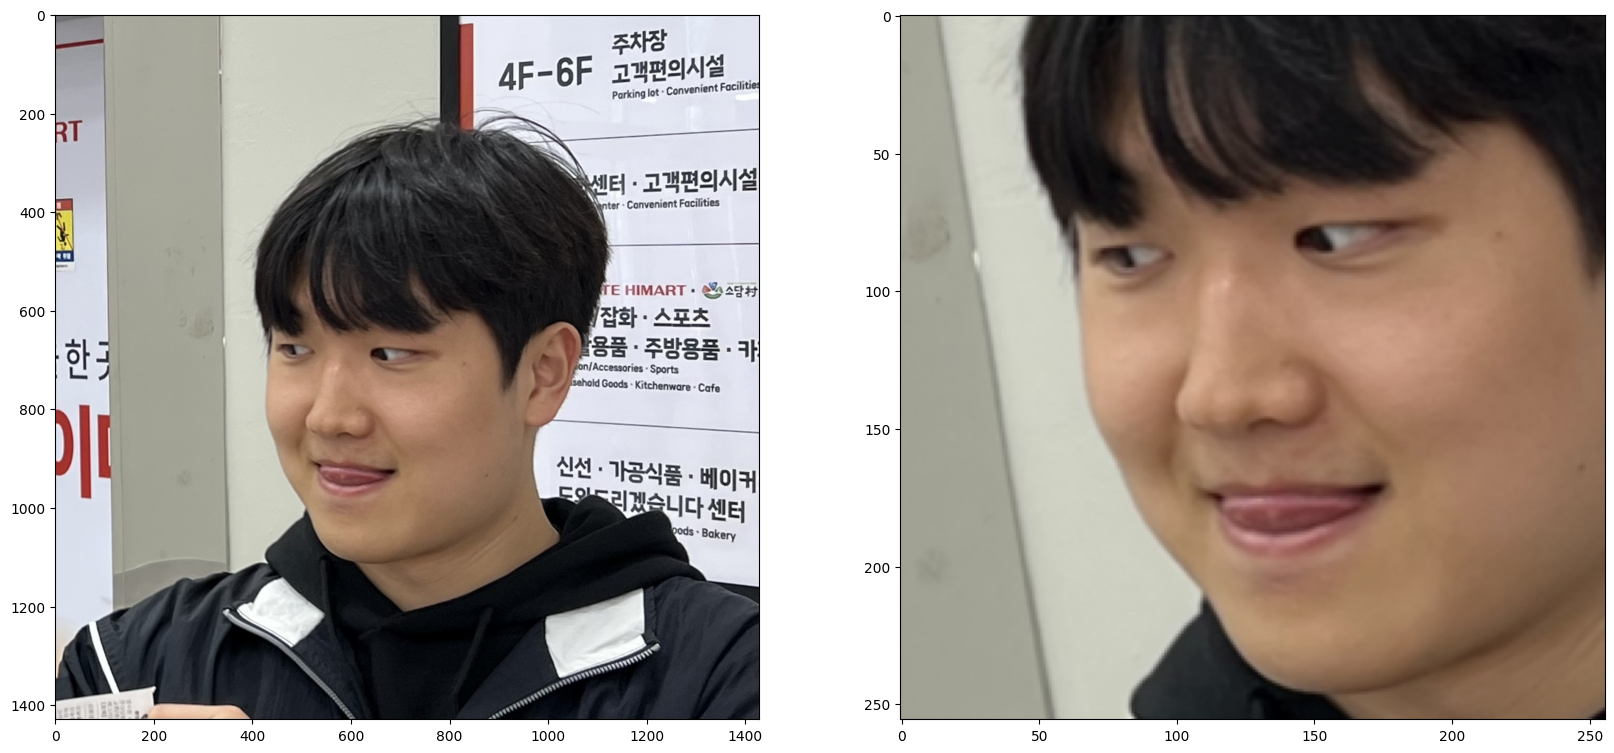

In [15]:
faces = dlib.get_face_chips(img, objs, size=256, padding=0.3)

fig, axes = plt.subplots(1, len(faces)+1, figsize=(20, 16))

axes[0].imshow(img)

for i, face in enumerate(faces):
    axes[i+1].imshow(face)